In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [11]:
df = pd.read_csv('temps.csv')
df = df.dropna()
df['dt'] = pd.DatetimeIndex(df['dt'])
#df = df[df.dt > '1900-1-1']
df = df[df.Country == "Guatemala"]
df = df.rename(columns={'dt': 'ds','AverageTemperature': 'y'})
df.sort_values(by="ds")
df = df.drop('AverageTemperatureUncertainty', axis =1)

df.tail(20)


,ds,y,Country
220312,2012-02-01,22.957,Guatemala
220313,2012-03-01,23.793,Guatemala
220314,2012-04-01,24.924,Guatemala
220315,2012-05-01,25.657,Guatemala
220316,2012-06-01,25.170,Guatemala
220317,2012-07-01,24.643,Guatemala
220318,2012-08-01,24.662,Guatemala
220319,2012-09-01,24.753,Guatemala
220320,2012-10-01,23.381,Guatemala
220321,2012-11-01,22.346,Guatemala


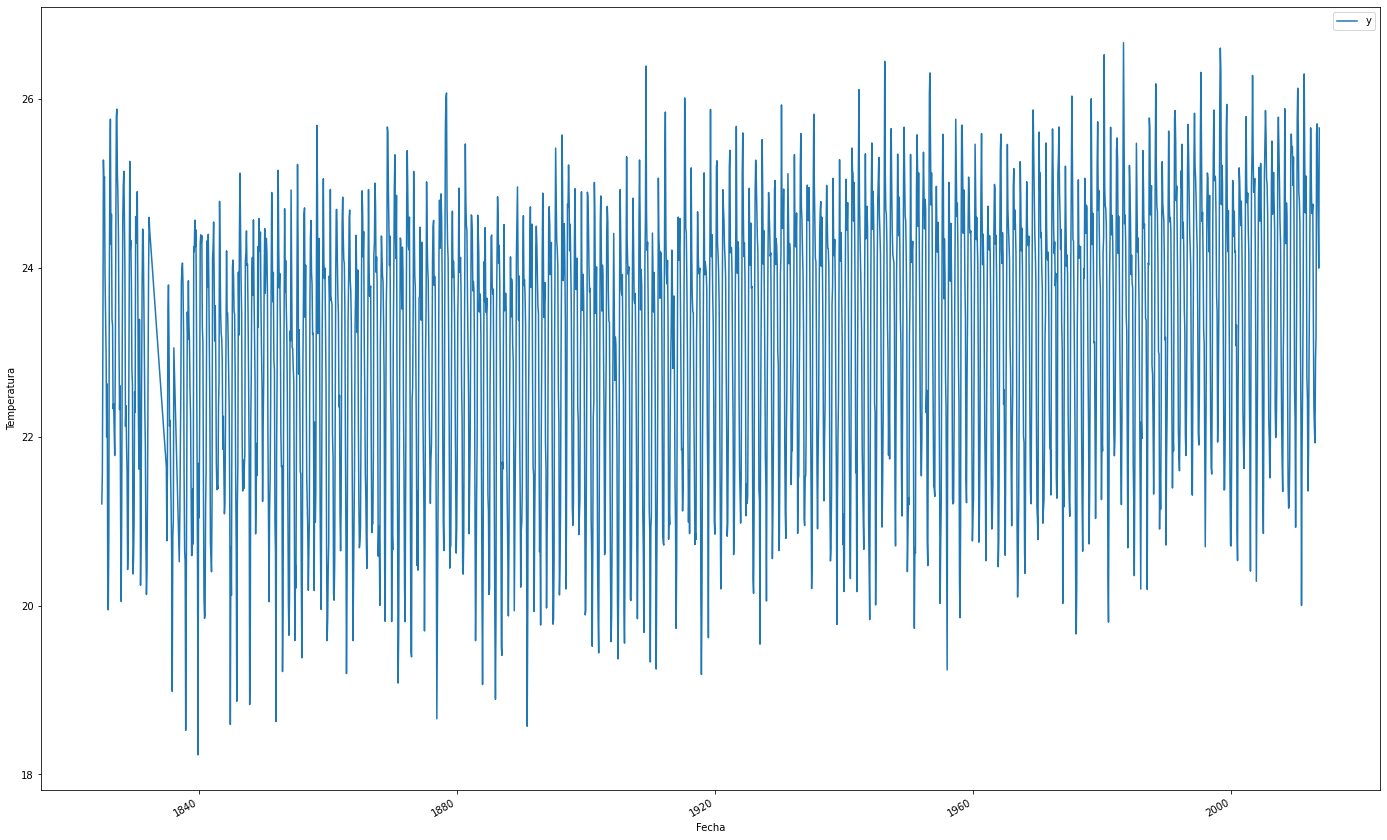

In [12]:

ax = df.set_index('ds').plot(figsize=(24,16))
ax.set_ylabel('Temperatura')
ax.set_xlabel('Fecha')

plt.show();

In [13]:
mi_modelo = Prophet(interval_width = 0.95)
mi_modelo.fit(df)

22:53:33 - cmdstanpy - INFO - Chain [1] start processing
22:53:33 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
#Prediccion de temperatura promedio en Guatemala de 2013 a 2016

fechas_futuras = mi_modelo.make_future_dataframe(periods=36, freq='MS')
print(fechas_futuras.tail())

             ds
2257 2016-05-01
2258 2016-06-01
2259 2016-07-01
2260 2016-08-01
2261 2016-09-01


In [15]:
prediccion = mi_modelo.predict(fechas_futuras)
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2257,2016-05-01,25.956036,24.920719,27.097521
2258,2016-06-01,25.418264,24.334453,26.455732
2259,2016-07-01,24.981315,23.885677,26.157676
2260,2016-08-01,25.003920,23.879639,26.122435
2261,2016-09-01,24.712124,23.624989,25.755545


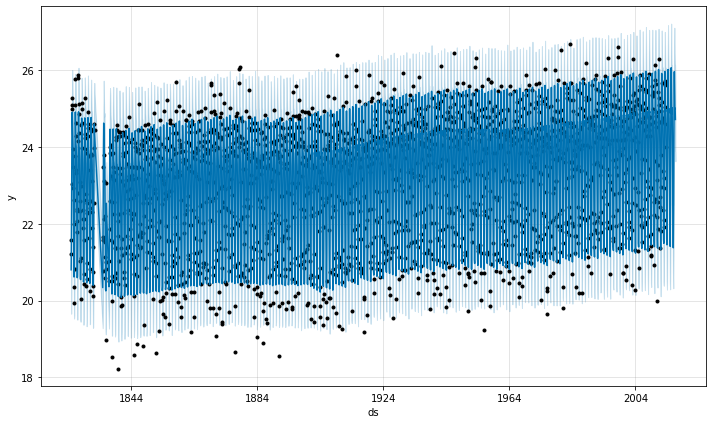

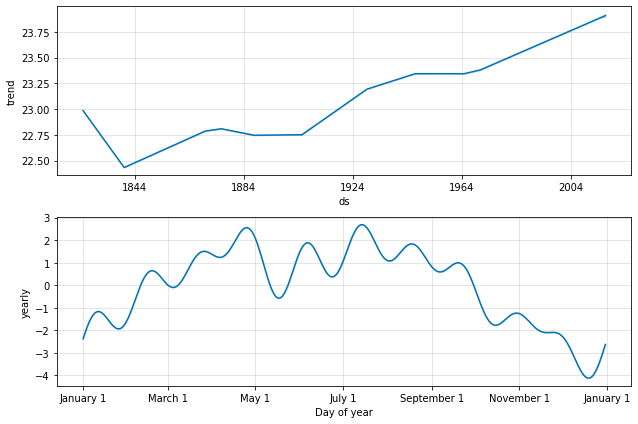

In [16]:
mi_modelo.plot(prediccion,
               uncertainty=True);

mi_modelo.plot_components(prediccion);


In [ ]:
#se puede observar en la grafica de tendencias que la temperatura de Guatemala ha ido incrementando con el paso de los años, lo que nos demuestra que el calentamiento global tambien esta afectando el pais.